# Import Basic Pakages

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Tensorflow Packages

In [26]:
import tensorflow as tf 
from tensorflow.python.client import device_lib #GPU Check
import tensorflow.keras #keras
from tensorflow.keras import layers 
from tensorflow.keras import Sequential,Input,Model, models 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.python.client import device_lib #GPU Check
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint #use for early stopping and reduction on level-out

In [27]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12951865547510495223
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10077863936
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6374271475571612601
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:02:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


# Import Data

In [28]:
mnist=pd.read_csv(r'C:\Users\sohka\OneDrive\Documents\computer_vision\RawData\MNIST\train.csv')
mnist


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
trainlab=mnist['label']
train=mnist.drop(columns=['label'])



# Regularization

In [30]:
train.shape
train = train/255

# Autoencoder Model

In [31]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Encoder

In [32]:
encoder = Model(input_img, encoded)

# Decoder

In [33]:
# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile Model

In [34]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train Model

In [35]:
with tf.device('/GPU:0'):
    autoencoder.fit(train, train,
                    epochs=101,
                    batch_size=1024,
                    shuffle=True,
                    validation_split=0.2)

Epoch 1/101
33/33 [==============================] - 4s 35ms/step - loss: 0.1520 - val_loss: 0.0776
Epoch 2/101
33/33 [==============================] - 0s 15ms/step - loss: 0.0713 - val_loss: 0.0679
Epoch 3/101
33/33 [==============================] - 0s 14ms/step - loss: 0.0643 - val_loss: 0.0603
Epoch 4/101
33/33 [==============================] - 0s 14ms/step - loss: 0.0565 - val_loss: 0.0527
Epoch 5/101
33/33 [==============================] - 0s 14ms/step - loss: 0.0496 - val_loss: 0.0464
Epoch 6/101
33/33 [==============================] - 1s 17ms/step - loss: 0.0443 - val_loss: 0.0421
Epoch 7/101
33/33 [==============================] - 1s 16ms/step - loss: 0.0408 - val_loss: 0.0392
Epoch 8/101
33/33 [==============================] - 0s 15ms/step - loss: 0.0381 - val_loss: 0.0367
Epoch 9/101
33/33 [==============================] - 0s 15ms/step - loss: 0.0359 - val_loss: 0.0347
Epoch 10/101
33/33 [==============================] - 1s 16ms/step - loss: 0.0340 - val_loss: 0.0329

In [36]:
encoded_imgs = encoder.predict(train)
decoded_imgs = decoder.predict(encoded_imgs)

1313/1313 [==============================] - 1s 849us/step


In [37]:
decoded_imgs.shape,encoded_imgs.shape

((42000, 784), (42000, 32))

# Compare decoded Image and Original Image

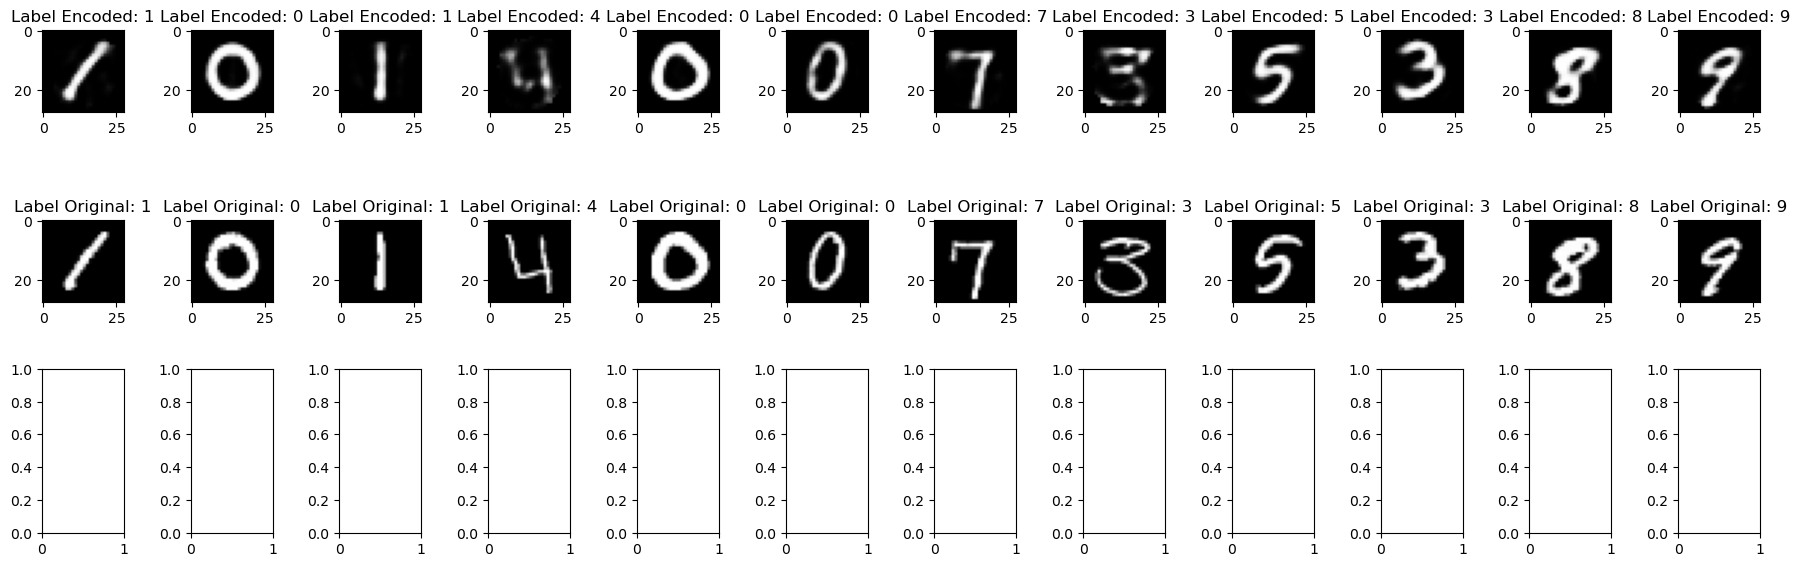

In [40]:
num_row = 3
num_col = 12 # plot images
decoded_imgs= decoded_imgs.reshape(42000,28,28)
newtrain=train.values.reshape(42000,28,28)
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_col):
    ax = axes[0, i%num_col]
    ax.imshow(decoded_imgs[i], cmap='gray')
    ax.set_title('Label Encoded: {}'.format(trainlab[i]))
for i in range(num_col):
    ax = axes[1, i%num_col]
    ax.imshow(newtrain[i], cmap='gray')
    ax.set_title('Label Original: {}'.format(trainlab[i]))

plt.tight_layout()
plt.show()
